<a href="https://colab.research.google.com/github/TheKoray18/American-Sign-Classification/blob/main/AmericanSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 

drive.mount('/content/drive/')


Mounted at /content/drive/


Kütüphanelerimizi import ediyoruz

In [2]:
import pandas as pd
import numpy as np

 - Train ve Test Datalarımızı Çağırıyoruz

In [34]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/sign_mnist_train.csv')

test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/sign_mnist_test.csv')

- Train datasetimize bakıyoruz


In [35]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


- Train datasetimizin boyutuna bakıyoruz

In [36]:
train.shape

(27455, 785)

- Test datasetimize bakıyoruz

In [37]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


- Test datasetimizin boyutuna bakıyoruz

In [39]:
test.shape

(7172, 785)

- Train datasetimizde ki "label" sütunu ile y_train elde ediyoruz

- y_train bizim label'larımızın olduğu datamız olacak.Sınıflandırmayı yaparken y_train'i bağımlı değişken olarak kullanacağız

In [40]:
y_train = train['label']

- y_train boyutuna bakıyoruz

In [41]:
y_train.shape

(27455,)

- train datasetimizden label sütununu siliyoruz

In [ ]:
train.drop('label',axis=1,inplace=True)

- Aşağıda göreceğiniz gibi label sütunu artık yok

In [44]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


- Train datasetini array'a çevirip x_train datamızı elde ediyoruz

In [45]:
x_train = train.values

- x_train datamızın boyutuna bakıyoruz

In [46]:
x_train.shape

(27455, 784)

- Test datasetimizde ki "label" sütunu ile y_test datamızı elde ediyoruz.

In [47]:
y_test = test['label']

In [48]:
y_test.shape

(7172,)

- Test datamızdan "label" sütununu çıkarttık

In [49]:
test.drop('label',axis=1,inplace=True)

In [50]:
test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,166,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,210,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,205,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


- Test datamızı arraye çevirerek x_test datamızı elde ediyoruz

In [51]:
x_test = test.values

- Train ve Test Datalarımızdan oluşturduğumuz yeni datalarımızın boyutlarına bakıyoruz

In [52]:
print("x_train.shape = " +str(x_train.shape))
print("y_train.shape = " +str(y_train.shape))
print("x_test.shape = " +str(x_test.shape))
print("y_test.shape = " +str(y_test.shape))

x_train.shape = (27455, 784)
y_train.shape = (27455,)
x_test.shape = (7172, 784)
y_test.shape = (7172,)


- y_train kullanarak labellarımıza bakıyoruz.Yani bizim classlarımız


In [53]:
unique = np.array(y_train)

np.unique(unique)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

- Seaborn ve Matplotlib ile bizim labellarımızın sayılarına bakıyoruz


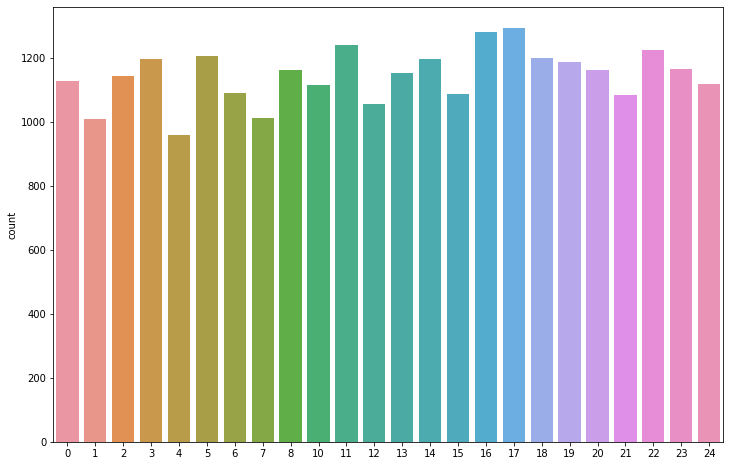

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

sns.countplot(x=unique)  # y_train için baktık

- x_train'de ki ilk resmimize bakıyoruz

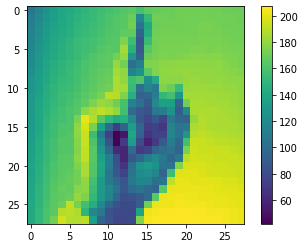

In [55]:
plt.imshow(x_train[0].reshape(28,28))
plt.colorbar()

- x_train'imizde ki ilk 25 resmimize bakıyoruz for döngüsü ile

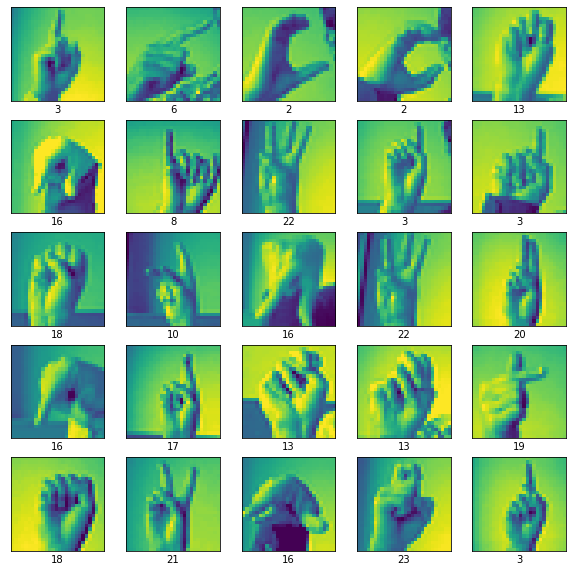

In [56]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i].reshape(28,28))
  plt.xlabel(unique[i])
  plt.xticks([])
  plt.yticks([])

- x_train ve x_test datalarımızı 255'e bölerek 0-1 arasında değerler haline getiriyoruz

In [57]:
x_train = x_train / 255.0 

x_test = x_test / 255.0 

In [58]:
print(x_train.shape[0])

print(x_test.shape[0])

27455
7172


- x_train ve x_test datalarımızı yeniden boyutlandırıyoruz

In [59]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

x_test = x_test.reshape(x_test.shape[0],28,28,1)


- Yeni boyutlandırdığımız dataların boyutlarına bakıyoruz


In [60]:
print(x_train.shape)

print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


- Yeniden boyutlandırdığımız x_train datamızın ilk resmine bakıyoruz

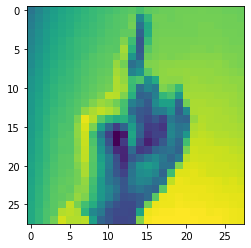

In [61]:
plt.imshow(x_train[0].reshape(28,28))

- LabelBinarizer kullanarak One Hot Encoding yapıyoruz 
- Keras.utils.np_utils to_categorical da kullanabilirdik fakat o zaman boyut hatası alıyoruz.Yani 24 sütunumuz olması gerekirken 25 sütunumuz oluyor.Bu da bizim sinir ağımızı eğitirken hata almamıza sebep oluyor

In [62]:
from sklearn.preprocessing import LabelBinarizer

label_bina = LabelBinarizer()

y_train = label_bina.fit_transform(y_train)

y_test = label_bina.fit_transform(y_test)

- One Hot Encoding yaptığımız y_train ve y_test datalarımızın yeni boyutları

In [63]:
print(y_train.shape)

print(y_test.shape)

(27455, 24)
(7172, 24)


- Tensorflow'u import ediyoruz


In [64]:
import tensorflow as tf

- Evrişimsel Sinir Ağı Modelimizi inşa ediyoruz.

- 2 kez Convolution(Evrişim) işlemi uyguluyoruz

- 2 kez Max Pooling işlemi uyguluyoruz

- Aktivasyon fonksiyonu olarak 'Relu' kullanıyoruz

- Optimizer 'Adam' kullanıyoruz

- myCallback adında bir class oluşturdum.Bu class modeli %99 Accuracy2e ulaştığında eğitimi kendiliğinden durduracak



In [65]:
def Train():
  class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
      if logs.get("accuracy") > 0.999:
        print("\n99 Accuracy'e Ulaştı!")
        self.model.stop_training = True

  callbacks = myCallback()

  model=tf.keras.Sequential([tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(24,activation='softmax')
                             ])
  
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

  history = model.fit(x_train,y_train,epochs=10,callbacks=[callbacks],validation_data=(x_test,y_test),verbose=1)

  cache={'history':model}

  return cache,history
  

In [67]:
cache,history = Train()

Epoch 1/10
858/858 [==============================] - 196s 229ms/step - loss: 0.7561 - accuracy: 0.7735 - val_loss: 0.4203 - val_accuracy: 0.8809
Epoch 2/10
858/858 [==============================] - 199s 232ms/step - loss: 0.0272 - accuracy: 0.9953 - val_loss: 0.4161 - val_accuracy: 0.9003
Epoch 3/10
858/858 [==============================] - 201s 234ms/step - loss: 0.0208 - accuracy: 0.9947 - val_loss: 0.3786 - val_accuracy: 0.9062
Epoch 4/10
858/858 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9994
99 Accuracy'e Ulaştı!
858/858 [==============================] - 198s 231ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.4069 - val_accuracy: 0.9173


In [68]:
model = cache['history']

- validation_accuracy ve valdation_loss sonuçlarına bakıyoruz

In [69]:
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=2)

225/225 - 11s - loss: 0.4069 - accuracy: 0.9173


- Sonuçlarımız aşağıda göreceğiniz gibi

In [70]:
print("test_loss :" +str(test_loss))
print("test_acc :" +str(test_acc))

test_loss :0.40693095326423645
test_acc :0.9173173308372498


- Modelimizin özetine bakıyoruz.Sinir ağımıızın output boyutlarına, toplam paramsları bu sekılde görüyoruz

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       295040    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_3 (Dense)              (None, 24)               

- train_accuracy ve validation_accuracy sonuçlarımızı grafiklendiriyoruz

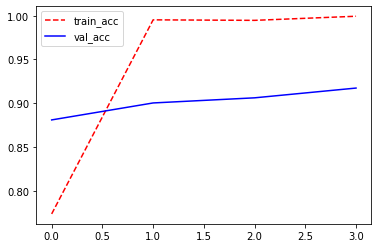

In [72]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc,'r--')
plt.plot(val_acc,'b-')
plt.legend(['train_acc','val_acc'])



- train_loss ve validation_loss değerlerimizi grafiklendiriyoruz

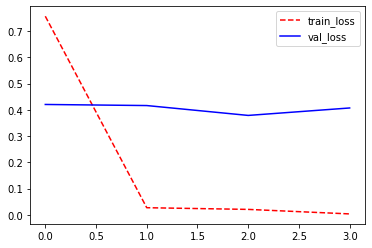

In [73]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss,'r--')
plt.plot(val_loss,'b-')
plt.legend(['train_loss','val_loss'],loc=1)

- x_test datamızı kullanarak modelimiz predict ederek y_pred datasını oluşturuyoruz

In [74]:
y_pred = model.predict(x_test)

- y_pred datamızın ilk değeri

In [75]:
np.argmax(y_pred[0])

6

- y_test datamızın ilk değeri.Gördüğünüz gibi modelimiz ilk değeri doğru şekilde sınıflandırılmış

In [76]:
np.argmax(y_test[0])

6

- y_pred datamız ile y_test datamızın ilk 25 değerleri arasında yapmış olduğu sınıflandırmasına baktık


In [77]:
for i in range(25):
  print(" prediction: {} = {} :Real".format(np.argmax(y_pred[i]),np.argmax(y_test[i])))
  if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
    print("True Prediction")
  else:
    print("False Prediction")


 prediction: 6 = 6 :Real
True Prediction
 prediction: 5 = 5 :Real
True Prediction
 prediction: 9 = 9 :Real
True Prediction
 prediction: 0 = 0 :Real
True Prediction
 prediction: 3 = 3 :Real
True Prediction
 prediction: 20 = 20 :Real
True Prediction
 prediction: 9 = 9 :Real
True Prediction
 prediction: 13 = 13 :Real
True Prediction
 prediction: 3 = 3 :Real
True Prediction
 prediction: 7 = 7 :Real
True Prediction
 prediction: 8 = 8 :Real
True Prediction
 prediction: 8 = 8 :Real
True Prediction
 prediction: 20 = 20 :Real
True Prediction
 prediction: 11 = 11 :Real
True Prediction
 prediction: 7 = 7 :Real
True Prediction
 prediction: 4 = 4 :Real
True Prediction
 prediction: 21 = 21 :Real
True Prediction
 prediction: 0 = 0 :Real
True Prediction
 prediction: 7 = 7 :Real
True Prediction
 prediction: 7 = 7 :Real
True Prediction
 prediction: 2 = 2 :Real
True Prediction
 prediction: 0 = 0 :Real
True Prediction
 prediction: 20 = 20 :Real
True Prediction
 prediction: 4 = 4 :Real
True Prediction
 pre

- np.round ile sadece 0 ve 1 lerden oluşan bir data elde ediyoruz.np.argmax kullanarak datanın içindeki en yüksek değer bizim sonucumuz oluyordu
-np.round ise bu en yüksek değeri 1 yapıp,diğer verileri 0 yapıyor

In [78]:
preds = np.round(model.predict(x_test),0)

In [80]:
print(preds[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
